In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
from pylab import rcParams
import matplotlib.pyplot as plt
plt.style.use('seaborn-white')

In [2]:
train = pd.read_csv("train.csv")

In [3]:
DataVal = pd.read_csv("test.csv")

In [4]:
train_copy = train.copy()

In [5]:
train.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [6]:
train.shape

(891, 12)

In [7]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 66.2+ KB


In [8]:
dubs = train.duplicated(['PassengerId'])
dubs.sum()

0

In [9]:
dubs = train.duplicated(['Name'])
dubs.sum()

0

In [10]:
D = ['PassengerId','Name','Cabin']

In [11]:
train.drop((D), axis=1, inplace=True)
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 9 columns):
Survived    891 non-null int64
Pclass      891 non-null int64
Sex         891 non-null object
Age         714 non-null float64
SibSp       891 non-null int64
Parch       891 non-null int64
Ticket      891 non-null object
Fare        891 non-null float64
Embarked    889 non-null object
dtypes: float64(2), int64(4), object(3)
memory usage: 52.2+ KB


In [12]:
DataVal.drop((D), axis=1, inplace=True)
DataVal.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 8 columns):
Pclass      418 non-null int64
Sex         418 non-null object
Age         332 non-null float64
SibSp       418 non-null int64
Parch       418 non-null int64
Ticket      418 non-null object
Fare        417 non-null float64
Embarked    418 non-null object
dtypes: float64(2), int64(3), object(3)
memory usage: 21.3+ KB


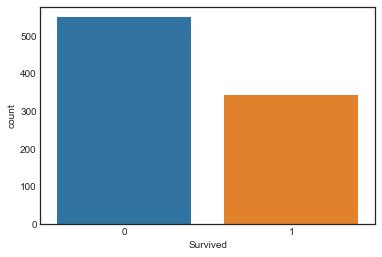

In [13]:
sns.countplot(train.Survived)

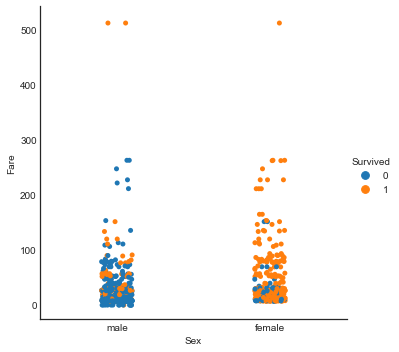

In [14]:
sns.catplot(x="Sex", y="Fare", hue="Survived", data=train)

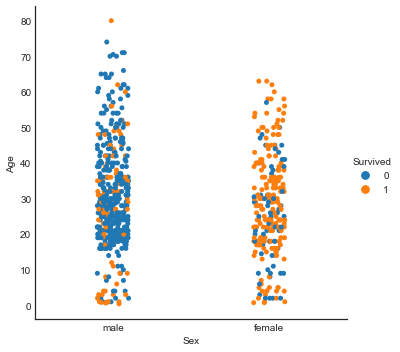

In [15]:
sns.catplot(x="Sex", y="Age", hue="Survived", data=train)

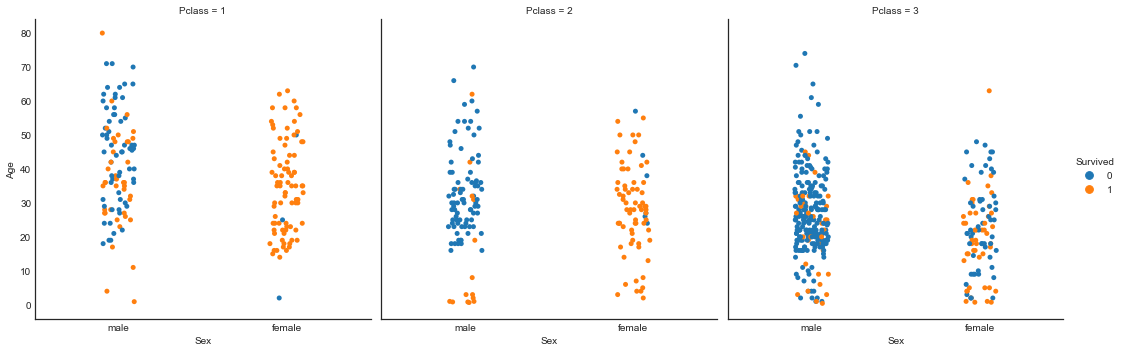

In [16]:
sns.catplot(x="Sex", y="Age", hue="Survived", col="Pclass", data=train)

In [17]:
train['Survived'].value_counts(sort = False)
labels =train['Survived'].value_counts(sort = True).index
sizes = train['Survived'].value_counts(sort = True)
labels
#sizes

Int64Index([0, 1], dtype='int64')

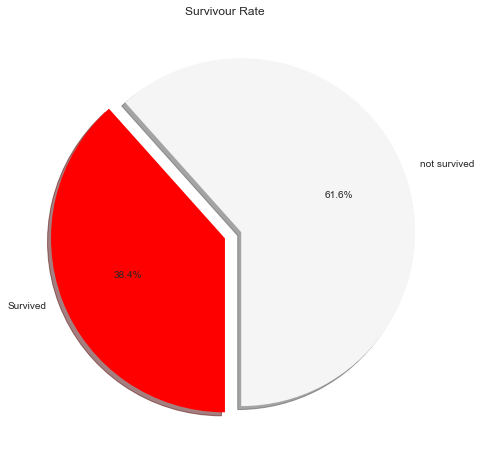

In [18]:
# Data to plot
#labels =train['Survived'].value_counts(sort = True).index
labels = ['not survived','Survived']
sizes = train['Survived'].value_counts(sort = True)


colors = ["whitesmoke","red"]
explode = (0.1,0)  # explode 1st slice
 
rcParams['figure.figsize'] = 8,8
# Plot
plt.pie(sizes, explode=explode, labels=labels, colors=colors,
        autopct='%1.1f%%', shadow=True, startangle=270,)

plt.title('Survivour Rate')
plt.show()

In [19]:
# to find missing data
def tofindnull(x):
    total = x.isnull().sum().sort_values(ascending=False)
    percent = (x.isnull().sum()/x.isnull().count()).sort_values(ascending=False)*100
    missing_data = pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])
    return missing_data

In [20]:
DataVal.shape

(418, 8)

(array([216.,   0.,   0.,   0.,   0., 184.,   0.,   0.,   0., 491.]),
 array([1. , 1.2, 1.4, 1.6, 1.8, 2. , 2.2, 2.4, 2.6, 2.8, 3. ]),
 <a list of 10 Patch objects>)

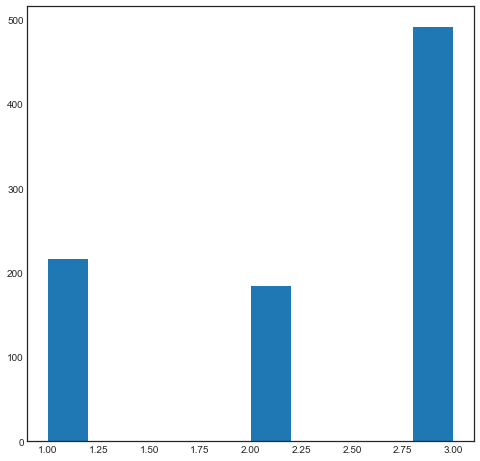

In [21]:
plt.hist(train['Pclass'])

C:\ProgramData\Anaconda3\lib\site-packages\numpy\lib\histograms.py:754: RuntimeWarning: invalid value encountered in greater_equal
  keep = (tmp_a >= first_edge)
C:\ProgramData\Anaconda3\lib\site-packages\numpy\lib\histograms.py:755: RuntimeWarning: invalid value encountered in less_equal
  keep &= (tmp_a <= last_edge)


(array([ 54.,  46., 177., 169., 118.,  70.,  45.,  24.,   9.,   2.]),
 array([ 0.42 ,  8.378, 16.336, 24.294, 32.252, 40.21 , 48.168, 56.126,
        64.084, 72.042, 80.   ]),
 <a list of 10 Patch objects>)

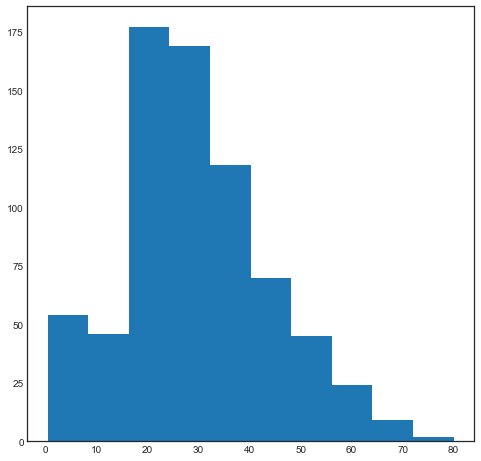

In [22]:
plt.hist(train['Age'],)

In [23]:
#to replace null value
from sklearn.base import TransformerMixin
class DataFrameImputer(TransformerMixin):
    def fit(self, X, y=None):
        self.fill = pd.Series([X[c].value_counts().index[0]
            if X[c].dtype == np.dtype('O') else X[c].median() for c in X],
            index=X.columns)
        return self
    def transform(self, X, y=None):
        return X.fillna(self.fill)

In [24]:
train_imputed = DataFrameImputer().fit_transform(train)

In [25]:
test_imputed = DataFrameImputer().fit_transform(DataVal)

In [26]:
train_imputed.describe()

,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000
mean,0.383838,2.308642,29.361582,0.523008,0.381594,32.204208
std,0.486592,0.836071,13.019697,1.102743,0.806057,49.693429
min,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,0.000000,2.000000,22.000000,0.000000,0.000000,7.910400
50%,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,1.000000,3.000000,35.000000,1.000000,0.000000,31.000000
max,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [27]:
test_imputed.describe()

,Pclass,Age,SibSp,Parch,Fare
count,418.000000,418.000000,418.000000,418.000000,418.000000
mean,2.265550,29.599282,0.447368,0.392344,35.576535
std,0.841838,12.703770,0.896760,0.981429,55.850103
min,1.000000,0.170000,0.000000,0.000000,0.000000
25%,1.000000,23.000000,0.000000,0.000000,7.895800
50%,3.000000,27.000000,0.000000,0.000000,14.454200
75%,3.000000,35.750000,1.000000,0.000000,31.471875
max,3.000000,76.000000,8.000000,9.000000,512.329200


In [28]:
tofindnull(train_imputed)

,Total,Percent
Embarked,0,0.0
Fare,0,0.0
Ticket,0,0.0
Parch,0,0.0
SibSp,0,0.0
Age,0,0.0
Sex,0,0.0
Pclass,0,0.0
Survived,0,0.0


In [29]:
tofindnull(test_imputed)

,Total,Percent
Embarked,0,0.0
Fare,0,0.0
Ticket,0,0.0
Parch,0,0.0
SibSp,0,0.0
Age,0,0.0
Sex,0,0.0
Pclass,0,0.0


C:\ProgramData\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


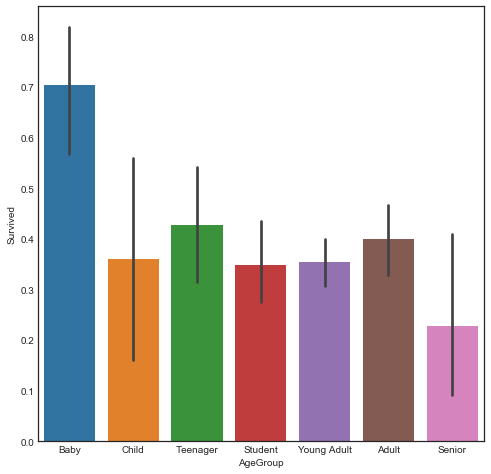

In [30]:
#normalizing age by evaluating to catgorical variables
bins = [ 0, 5, 12, 18, 24, 35, 60, np.inf]
labels = [ 'Baby', 'Child', 'Teenager', 'Student', 'Young Adult', 'Adult', 'Senior']
train_imputed['AgeGroup'] = pd.cut(train_imputed["Age"], bins, labels = labels)
test_imputed['AgeGroup'] = pd.cut(test_imputed["Age"], bins, labels = labels)

#draw a bar plot of Age vs. survival
sns.barplot(x="AgeGroup", y="Survived", data=train_imputed)
plt.show()

(array([732., 106.,  31.,   2.,  11.,   6.,   0.,   0.,   0.,   3.]),
 array([  0.     ,  51.23292, 102.46584, 153.69876, 204.93168, 256.1646 ,
        307.39752, 358.63044, 409.86336, 461.09628, 512.3292 ]),
 <a list of 10 Patch objects>)

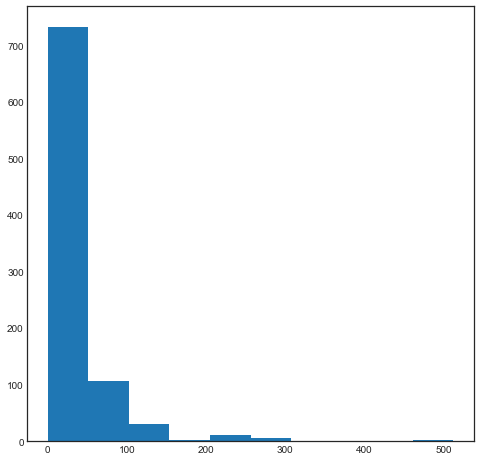

In [31]:
plt.hist(train_imputed['Fare'])

In [32]:
train_imputed.drop(('Fare'), axis=1, inplace=True)
train_imputed.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 9 columns):
Survived    891 non-null int64
Pclass      891 non-null int64
Sex         891 non-null object
Age         891 non-null float64
SibSp       891 non-null int64
Parch       891 non-null int64
Ticket      891 non-null object
Embarked    891 non-null object
AgeGroup    891 non-null category
dtypes: category(1), float64(1), int64(4), object(3)
memory usage: 46.4+ KB


In [33]:
test_imputed.drop(('Fare'), axis=1, inplace=True)
test_imputed.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 8 columns):
Pclass      418 non-null int64
Sex         418 non-null object
Age         418 non-null float64
SibSp       418 non-null int64
Parch       418 non-null int64
Ticket      418 non-null object
Embarked    418 non-null object
AgeGroup    418 non-null category
dtypes: category(1), float64(1), int64(3), object(3)
memory usage: 18.6+ KB


In [34]:
from sklearn.model_selection import train_test_split
sv_train, sv_test, tv_train, tv_test = train_test_split(train_imputed, train_imputed['Survived'], test_size=0.2, random_state=0)

In [35]:
sv_train.shape

(712, 9)

In [36]:
tv_train.head(10)

140    0
439    0
817    0
378    0
491    0
331    0
588    0
358    1
674    0
162    0
Name: Survived, dtype: int64

In [37]:
sv_test.head(10)

,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Embarked,AgeGroup
495,0,3,male,28.0,0,0,2627,C,Young Adult
648,0,3,male,28.0,0,0,S.O./P.P. 751,S,Young Adult
278,0,3,male,7.0,4,1,382652,Q,Child
31,1,1,female,28.0,1,0,PC 17569,C,Young Adult
255,1,3,female,29.0,0,2,2650,C,Young Adult
298,1,1,male,28.0,0,0,19988,S,Young Adult
609,1,1,female,40.0,0,0,PC 17582,S,Adult
318,1,1,female,31.0,0,2,36928,S,Young Adult
484,1,1,male,25.0,1,0,11967,C,Young Adult
367,1,3,female,28.0,0,0,2626,C,Young Adult


In [38]:
#sv_test.drop(('Survived'), axis=1)

In [39]:
import statsmodels.formula.api as sm

In [40]:
logit_model = sm.logit('Survived~Pclass+Sex+Age+SibSp+Parch+Embarked+AgeGroup',data = sv_train).fit()

Optimization terminated successfully.
         Current function value: 0.435358
         Iterations 7


In [41]:
logit_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:               Survived   No. Observations:                  712
Model:                          Logit   Df Residuals:                      698
Method:                           MLE   Df Model:                           13
Date:                Sat, 02 Feb 2019   Pseudo R-squ.:                  0.3460
Time:                        22:17:34   Log-Likelihood:                -309.97
converged:                       True   LL-Null:                       -473.99
                                        LLR p-value:                 3.209e-62
===========================================================================================
                              coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------------
Intercept                   6.9341      0.767      9.039      0.000       5.431       8.438
Sex[T.male]                -2.8258      0.233    -12.130      0.000      -3.282      -2.369
Embarked[T.Q]               0.0615      0.425      0.145      0.885      -0.772       0.895
Embarked[T.S]              -0.3450      0.267     -1.293      0.196      -0.868       0.178
AgeGroup[T.Child]          -1.7287      0.792     -2.183      0.029      -3.281      -0.176
AgeGroup[T.Teenager]       -2.4139      0.759     -3.181      0.001      -3.901      -0.927
AgeGroup[T.Student]        -2.5352      0.787     -3.220      0.001      -4.078      -0.992
AgeGroup[T.Young Adult]    -2.3909      0.903     -2.648      0.008      -4.160      -0.622
AgeGroup[T.Adult]          -2.5310      1.260     -2.009      0.045      -5.001      -0.061
AgeGroup[T.Senior]         -3.5048      1.922     -1.824      0.068      -7.271       0.261
Pclass                     -1.0417      0.141     -7.388      0.000      -1.318      -0.765
Age                        -0.0151      0.027     -0.561      0.575      -0.068       0.038
SibSp                      -0.4972      0.141     -3.521      0.000      -0.774      -0.220
Parch                      -0.1464      0.140     -1.046      0.295      -0.421       0.128
===========================================================================================
"""

In [42]:
predictions_test=np.round(logit_model.predict(sv_test))

In [43]:
predictions_test.head(10)

495    0.0
648    0.0
278    0.0
31     1.0
255    1.0
298    0.0
609    1.0
318    1.0
484    0.0
367    1.0
dtype: float64

In [44]:
from sklearn.metrics import accuracy_score 
Accuracy_Score = accuracy_score(tv_test,predictions_test)

In [45]:
Accuracy_Score

0.8268156424581006

In [46]:
logit_model = sm.logit('Survived~Pclass+Sex+Age+SibSp+Parch+Embarked+AgeGroup',data = train_imputed).fit()

Optimization terminated successfully.
         Current function value: 0.429397
         Iterations 7


In [47]:
predictions_test=np.round(logit_model.predict(test_imputed))

In [48]:
predictions_test.head(10)

0    0.0
1    0.0
2    0.0
3    0.0
4    0.0
5    0.0
6    1.0
7    0.0
8    1.0
9    0.0
dtype: float64

In [49]:
predictions_test.count()

418

In [50]:
#output = pd.DataFrame({ 'PassengerId' : id, 'Survived': predictions_test})
#output.to_csv('submission.csv', index=False)